# Projeto para departamento médico - Análise e diagnóstico de imagens médicas com agente de IA



## Instalação das bibliotecas






In [ ]:
!pip install -q agno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 913.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.4/836.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 10.9 MB/s eta 0:00:00


In [ ]:
import os
from agno.agent import Agent
from agno.models.google import Gemini
from agno.media import Image as AgnoImage
from PIL import Image as PILImage

## Carregando a LLM Multimodal (Gemini)




## Enviando uma imagem  



In [ ]:
from google.colab import files
upload = files.upload()

Saving img-medica-01.png to img-medica-01.png
Saving img-medica-02.png to img-medica-02.png
Saving img-medica-03.png to img-medica-03.png


## Lendo e exibindo a imagem



In [ ]:
img_path = next(iter(upload))
print(img_path)

img-medica-01.png


In [ ]:
img_path = "img-medica-01.png"

In [ ]:
img = PILImage.open(img_path)

In [ ]:
img.size

(1265, 760)

In [ ]:
1265 / 760

1.6644736842105263

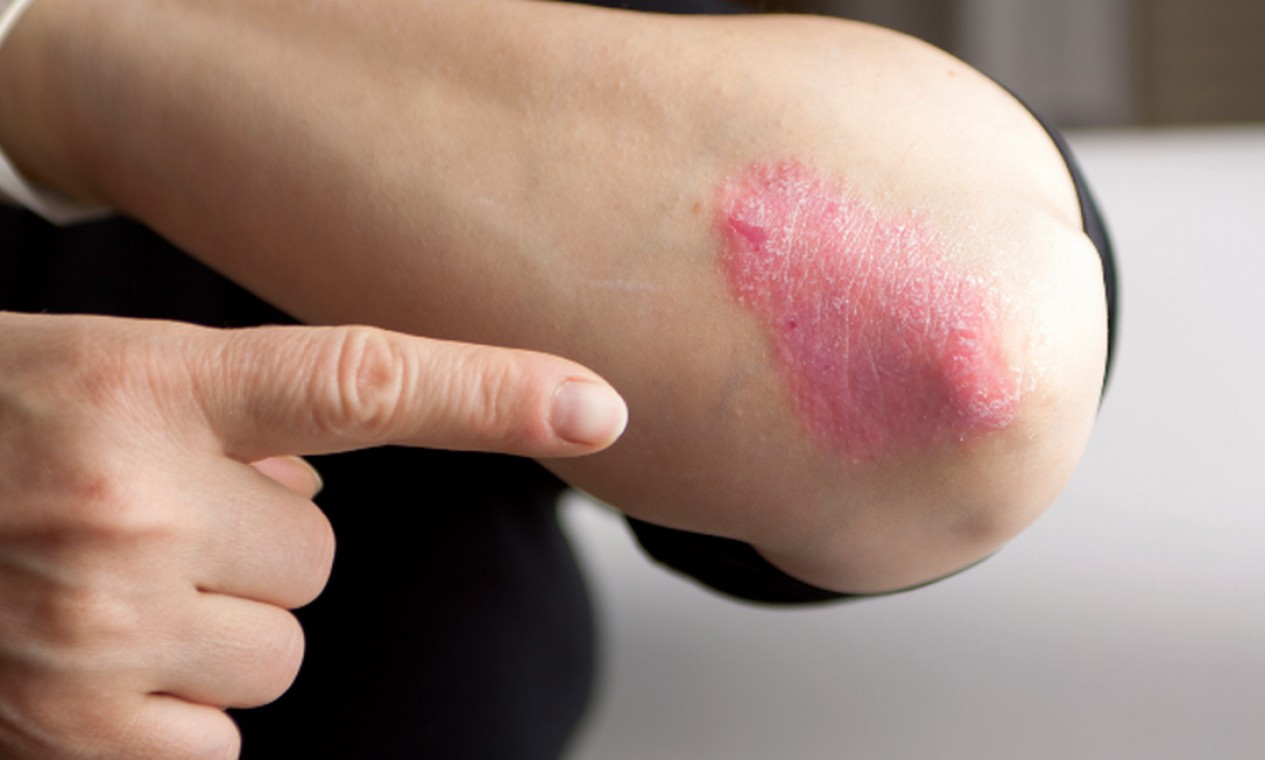

In [ ]:
from IPython.display import Image, display
display(img)

## Pré-processamento da imagem antes da análise



In [ ]:
600 / 1.66

361.44578313253015

In [ ]:
def preprocess_image(img_path):
  """Redimensiona a imagem e salva em formato temporário."""
  image = PILImage.open(img_path)
  width, height = image.size
  aspect_ratio = width / height
  img_width = 600
  img_height = int(img_width / aspect_ratio)
  resized_img = image.resize((img_width, img_height))

  temp_path = "temp_img.png"
  resized_img.save(temp_path)

  return temp_path, resized_img

In [ ]:
temp_path, temp_img = preprocess_image(img_path)

In [ ]:
temp_path

'temp_img.png'

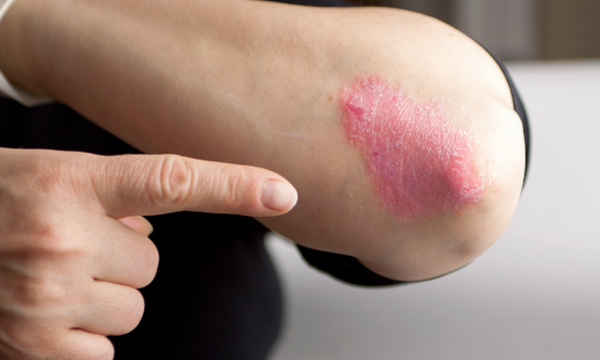

In [ ]:
display(temp_img)

## Formato de imagem Agno



In [ ]:
agno_img = AgnoImage(filepath=temp_path)

## Inicializando o Agente com LLM de Visão



In [ ]:
from agno.agent import Agent
from agno.models.google import Gemini

id_model = "gemini-2.0-flash"

med_agent = Agent(model = Gemini(id = id_model))

In [ ]:
import os
os.environ["GOOGLE_API_KEY"]  = "#######"

## Rodando o modelo e obtendo a resposta



In [ ]:
prompt = "analise e descreva brevemente essa imagem, em português"

res = med_agent.run(prompt, images=[agno_img])
res.content

'A imagem mostra o braço de uma pessoa, com uma lesão avermelhada e inflamada no cotovelo. A pessoa está apontando para a lesão com o dedo indicador. A pele ao redor da lesão parece normal. A lesão sugere uma possível irritação, inflamação ou condição de pele como eczema ou psoríase.'

## Exibindo melhor o resultado



In [ ]:
def format_res(res, return_thinking=False):
  res = res.strip()

  if return_thinking:
    res = res.replace("<think>", "[pensando...] ")
    res = res.replace("</think>", "\n---\n")

  else:
    if "</think>" in res:
      res = res.split("</think>")[-1].strip()

  res = res.replace("```","")
  return res

def show_res(res):
    from IPython.display import Markdown
    display(Markdown(res))

In [ ]:
show_res(format_res(res.content))

A imagem mostra o braço de uma pessoa, com uma lesão avermelhada e inflamada no cotovelo. A pessoa está apontando para a lesão com o dedo indicador. A pele ao redor da lesão parece normal. A lesão sugere uma possível irritação, inflamação ou condição de pele como eczema ou psoríase.

## Adicionando tudo em uma função



In [ ]:
def llm_img(med_agent, prompt, agno_img):
  res = med_agent.run(prompt, images=[agno_img])
  show_res(format_res(res.content))
  return res

In [ ]:
prompt = "Analise essa imagem e forneça uma explicação detalhada em português"

res = llm_img(med_agent, prompt, agno_img)

A imagem mostra o braço de uma pessoa com uma lesão na pele no cotovelo. A lesão é avermelhada, com uma aparência escamosa e inflamada. Parece se tratar de uma área de pele irritada ou inflamada, possivelmente eczema, psoríase, ou outra condição dermatológica. A pessoa está apontando para a lesão com o dedo indicador, presumivelmente para chamar a atenção para o problema. O fundo da imagem é neutro, com uma parede clara e um detalhe de roupa escura, o que ajuda a focalizar a atenção na lesão no braço. Dada a aparência da pele e a localização no cotovelo, psoríase é um diagnóstico possível, mas a avaliação médica profissional seria necessária para determinar a causa exata e o tratamento adequado.

## Defininido prompts para análise de imagens médicas



### 1) Prompt resumido e objetivo


In [ ]:
prompt = "Analise esta imagem médica e forneça um resumo objetivo dos achados relevantes, incluindo possíveis anomalias visuais e uma hipótese diagnóstica provável. "

res = llm_img(med_agent, prompt, agno_img)

Aqui está uma análise da imagem:

**Achados relevantes:**

*   A imagem mostra o cotovelo de uma pessoa.
*   Uma grande placa vermelha e escamosa está presente na pele do cotovelo. A placa parece bem demarcada e elevada.
*   Há algumas áreas de pele levemente inflamadas ao redor da placa.

**Possível hipótese diagnóstica:**

Com base na aparência visual, uma hipótese diagnóstica provável é a **psoríase**. A psoríase é uma doença inflamatória crônica da pele que frequentemente se manifesta como placas vermelhas e escamosas nos cotovelos, joelhos e couro cabeludo.

**Isenção de responsabilidade:** esta análise é baseada apenas na aparência visual da imagem fornecida e não é um diagnóstico médico. Um diagnóstico preciso requer uma avaliação física completa por um profissional de saúde qualificado.

### 2) Prompt para Classificação da Imagem



In [ ]:
prompt_classific = """Classifique o tipo de imagem médica.
Por exemplo:
- Raio-X
- Ressonância Magnética
- Tomografia Computadorizada
- Ultrassom
- Fotografia clínica comum
- Não é imagem médica

Não forneça mais nenhuma informação."""

res = llm_img(med_agent, prompt_classific, agno_img)

Fotografia clínica comum

In [ ]:
temp_path, temp_img = preprocess_image("/content/img-medica-02.png")

In [ ]:
agno_img2 = AgnoImage(filepath=temp_path)
res = llm_img(med_agent, prompt_classific, agno_img2)

Raio-X

### 3) Prompt para análise detalhada



In [ ]:
prompt_analysis = """
Você é um especialista altamente qualificado em imagens médicas, com profundo conhecimento em diagnóstico por imagem.
Analise a imagem médica e estruture sua resposta (em português) da seguinte forma:

### 1. Tipo de imagem e região
 - Identifique o tipo de exame (raio-X, ressonância magnética, tomografia, ultrassom, etc.).
 - Especifique a região anatômica e o posicionamento do paciente.
 - Avalie a qualidade técnica da imagem (resolução, cortes, artefatos, etc.).

### 2. Achados relevantes
 - Aponte observações clínicas relevantes de forma sistemática.
 - Descreva possíveis anomalias, com detalhes visuais.

### 3. Avaliação diagnóstica
 - Proponha um diagnóstico principal com nível de confiança (ex: alto, moderado).
 - Liste diagnósticos diferenciais por ordem de probabilidade.
 - Seja sempre sincero quanto à certeza que você possui sobre o diagnóstico.
 - Justifique com base nas evidências visuais encontradas.
 - Destaque qualquer detalhe crítico ou urgente.

### 4. Explicação em linguagem leiga
 - Reescreva os achados de forma compreensível para o paciente.
 - Evite jargões médicos ou explique-os brevemente.
 - Use analogias visuais ou comparações comuns quando útil.
 - Aborde preocupações frequentes que pacientes possuem, relacionado a esse tipo de exame.

"""

res = llm_img(med_agent, prompt_analysis, agno_img)

Ok, vamos analisar a imagem.

### 1. Tipo de imagem e região
*   **Tipo de exame:** Radiografia (raio-X).
*   **Região anatômica:** Tórax.
*   **Posicionamento do paciente:** PA (póstero-anterior).
*   **Qualidade técnica:** A qualidade da imagem é aceitável, permitindo a visualização das estruturas torácicas. Há boa penetração dos raios-X, possibilitando identificar as estruturas mediastinais e pulmonares.

### 2. Achados relevantes
*   **Padrão pulmonar:** Observa-se um padrão reticular bilateral difuso, predominando nos campos pulmonares médios e inferiores. Este padrão é caracterizado por linhas finas e densidades que se entrelaçam, criando uma aparência de "rede".
*   **Consolidações:** Áreas de consolidação (áreas brancas, densas) são vistas, principalmente no pulmão direito, sem broncograma aéreo evidente.
*   **Hilos pulmonares:** Os hilos pulmonares parecem proeminentes bilateralmente, possivelmente congestos.
*   **Silhueta cardíaca:** A silhueta cardíaca parece normal em tamanho.
*   **Mediastino:** O mediastino não apresenta alargamentos significativos aparentes.
*   **Pneumotórax/Derrame pleural:** Ausência de evidências de pneumotórax ou derrame pleural.
*   **Estruturas ósseas:** As estruturas ósseas da caixa torácica (costelas, clavículas) parecem íntegras.

### 3. Avaliação diagnóstica
*   **Diagnóstico principal:** Pneumonia intersticial bilateral com consolidações multifocais. Nível de confiança: Moderado.

*   **Diagnósticos diferenciais:**

    1.  **Edema pulmonar:** Principalmente cardiogênico, devido à possível congestão dos hilos.
    2.  **Doença pulmonar intersticial difusa (DPID):** A imagem pode refletir um processo inflamatório ou fibrótico crônico, mas a evolução aguda sugere etiologia infecciosa.
    3.  **Pneumocistose:** Considerar em pacientes imunocomprometidos.
    4.  **Sarcoidose:** Menos provável, mas deve ser lembrada.
*   **Justificativa:** O padrão reticular bilateral difuso, juntamente com as áreas de consolidação, sugere um processo inflamatório ou infeccioso nos pulmões. A ausência de broncograma aéreo nas consolidações pode indicar preenchimento alveolar. A proeminência dos hilos e o padrão reticular difuso podem estar associados a edema.
*   **Detalhe crítico/urgente:** É importante avaliar o estado clínico do paciente e considerar a necessidade de coleta de amostras para análise microbiológica (escarro, lavado broncoalveolar) para identificação do agente etiológico, especialmente em pacientes com suspeita de pneumonia infecciosa.

### 4. Explicação em linguagem leiga

"O exame de raio-X do seu tórax mostra algumas alterações nos seus pulmões. Vemos um padrão como se fosse uma 'renda' nos dois pulmões, e algumas áreas que parecem mais 'cheias' ou densas.

Isso pode indicar uma inflamação nos pulmões, como uma pneumonia. Também precisamos investigar a possibilidade de líquido nos pulmões ou outras doenças pulmonares.

O importante agora é procurar um médico para que ele possa avaliar seus sintomas e pedir exames complementares, se necessário, para descobrir a causa exata do problema e iniciar o tratamento adequado. Em alguns casos, pode ser necessário colher amostras de secreção dos pulmões para identificar o que está causando a infecção."

**Preocupações frequentes de pacientes com esse tipo de exame:**

*   **Radiação:** A dose de radiação em um raio-X de tórax é baixa e os benefícios do diagnóstico superam os riscos.
*   **Gravidade:** A visualização de alterações nos pulmões pode gerar ansiedade. É fundamental ressaltar que nem toda alteração é grave e que o diagnóstico definitivo depende da avaliação clínica e de exames complementares.
*   **Contágio (se for pneumonia):** Explicar que nem todas as pneumonias são contagiosas e que, mesmo as que são, podem ser tratadas com antibióticos. É importante reforçar as medidas de higiene para evitar a disseminação.

Espero que esta análise seja útil. Lembre-se que esta é apenas uma interpretação baseada na imagem e que o diagnóstico final depende da avaliação do seu médico.

## Agente médico com capacidade de pesquisa



### Habilitando a ferramenta de pesquisa (Tavily)



In [ ]:
!pip install tavily-python -q

In [ ]:
from agno.tools.tavily import TavilyTools
import os
import getpass

os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


### Criar novo agente e atribuindo a tool



In [ ]:
from textwrap import dedent

research_agent = Agent(
    name = "Researcher Agent",
    role ="Pesquisador médico",
    instructions=dedent(
        """Você é um pesquisador médico responsável por buscar informações complementares sobre os achados identificados na imagem médica.
        Utilize ferramentas de busca para encontrar literatura médica recente, protocolos de tratamento padrão e avanços tecnológicos relevantes.
        Forneça referências confiáveis que apoiem a análise diagnóstica."""
    ),
    model=Gemini(id=id_model),
    tools=[TavilyTools()],
    debug_mode=True,
    show_tool_calls=True,
)

### Outras ferramentas úteis para medicina (PubMedTool)


### Prompt de pesquisa



In [ ]:
analysis = res.content

In [ ]:
prompt_search_template = """Com base na seguinte análise de imagem médica, realize uma pesquisa complementar.
 - Forneça o resultado direto, sem nenhuma frase ou apresentação sua antes.
 - Utilize uma ferramenta de busca médica (como Tavily ou PubMed) para encontrar referências atuais.
 - Traga protocolos clínicos ou avanços tecnológicos relevantes.
 - Forneça 2 a 3 links ou resumos com referências confiáveis.
 - Organize sua resposta de forma clara, estruturada e precisa, usando marcação (markdown) quando possível para facilitar a leitura.

Resultado da análise médica: "{}"
"""

prompt_search = prompt_search_template.format(analysis)
print(prompt_search)

Com base na seguinte análise de imagem médica, realize uma pesquisa complementar.
 - Forneça o resultado direto, sem nenhuma frase ou apresentação sua antes.
 - Utilize uma ferramenta de busca médica (como Tavily ou PubMed) para encontrar referências atuais.
 - Traga protocolos clínicos ou avanços tecnológicos relevantes.
 - Forneça 2 a 3 links ou resumos com referências confiáveis.
 - Organize sua resposta de forma clara, estruturada e precisa, usando marcação (markdown) quando possível para facilitar a leitura.

Resultado da análise médica: "Ok, vamos analisar a imagem.

### 1. Tipo de imagem e região
*   **Tipo de exame:** Radiografia (raio-X).
*   **Região anatômica:** Tórax.
*   **Posicionamento do paciente:** PA (póstero-anterior).
*   **Qualidade técnica:** A qualidade da imagem é aceitável, permitindo a visualização das estruturas torácicas. Há boa penetração dos raios-X, possibilitando identificar as estruturas mediastinais e pulmonares.

### 2. Achados relevantes
*   **Padrão

### Rodando o agente


In [ ]:
result = research_agent.run(prompt_search)
show_res(format_res(result.content))

DEBUG ****** Agent ID: 27d9859a-f183-4efc-bba8-eb52135a506c ******              
DEBUG ***** Session ID: 9ed362f8-dee6-4790-83af-04a8342a62c5 *****              
DEBUG Processing tools for model                                                
DEBUG Added tool web_search_using_tavily from tavily_tools                      
DEBUG ** Agent Run Start: 92b452ae-c550-476e-a50b-2aeacef0dd73 ***              
DEBUG ------------------ Google Response Start -------------------              
DEBUG ----------------- Model: gemini-2.0-flash ------------------              
DEBUG ========================== system ==========================              
DEBUG <your_role>                                                               
      Pesquisador médico                                                        
      </your_role>                                                              
                                                                                
      <instructions>        

Com base na análise da imagem médica fornecida, aqui estão algumas referências e informações complementares relevantes:

*   **Pneumonia Intersticial:**

    *   **Referência:** [UpToDate - Diagnosis of community-acquired pneumonia in adults](https://www.uptodate.com/contents/diagnosis-of-community-acquired-pneumonia-in-adults)
        *   Este artigo aborda os critérios diagnósticos para pneumonia adquirida na comunidade (PAC), que pode apresentar padrões intersticiais e consolidações. Ele discute a importância da avaliação clínica, exames de imagem e testes microbiológicos para identificar o agente etiológico.

*   **Edema Pulmonar Cardiogênico:**

    *   **Referência:** [American Heart Association - Pulmonary Edema](https://www.heart.org/en/health-topics/heart-failure/what-is-heart-failure/pulmonary-edema)
        *   Este recurso fornece informações sobre edema pulmonar cardiogênico, suas causas, sintomas e tratamento. Ele destaca a importância da avaliação da função cardíaca e do controle da sobrecarga de volume.

*   **Doença Pulmonar Intersticial Difusa (DPID):**

    *   **Referência:** [American Thoracic Society - Diffuse Parenchymal Lung Disease (Interstitial Lung Disease)](https://www.thoracic.org/patients/patient-resources/resources/interstitial-lung-disease)
        *   Este guia da ATS oferece uma visão geral das DPIDs, incluindo suas diversas causas, padrões de imagem e abordagens diagnósticas. Ele enfatiza a importância da biópsia pulmonar em alguns casos para determinar o diagnóstico específico.

In [ ]:
med_agent = Agent(
    name="Medical Image Agent",
    role="Especialista em imagens médicas",
    model=Gemini(id=id_model),
    markdown=True
)

In [ ]:
print(med_agent.name)
print(research_agent.name)

Medical Image Agent
Researcher Agent


## Construindo a Pipeline completa: Análise da imagem + Pesquisa médica



In [ ]:
def process_img_pipeline(agno_img=None, debug=False, prompt_analysis=prompt_analysis):
  if agno_img is None:
    return "Erro: nenhuma imagem foi fornecida."

  res = med_agent.run(prompt_analysis, images=[agno_img])
  analysis = res.content

  if debug:
    research_agent.debug_mode = True
  else:
    research_agent.debug_mode = False
  prompt_search = prompt_search_template.format(analysis)
  res_search = research_agent.run(prompt_search)

  result = f"### 📋 Resultado da Análise da Imagem:\n{format_res(analysis)}\n\n"
  result = result + "---\n\n" + f"### 📚 Resultado da Pesquisa:\n{format_res(res_search.content)}"

  return result

In [ ]:
result = process_img_pipeline(agno_img)
show_res(result)

### 📋 Resultado da Análise da Imagem:
### 1. Tipo de imagem e região
- **Tipo de exame:** Radiografia (raio-X).
- **Região anatômica:** Tórax, posicionamento póstero-anterior (PA).
- **Qualidade técnica:** A imagem apresenta boa qualidade técnica. A resolução permite avaliar as estruturas torácicas. Não há artefatos significativos que prejudiquem a interpretação.

### 2. Achados relevantes
- **Pulmões:** Presença de opacidades reticulares bilaterais difusas. As opacidades são mais proeminentes nos campos pulmonares superiores.
- **Hilos pulmonares:** Sem alterações significativas aparentes.
- **Coração:** Tamanho cardíaco dentro dos limites normais.
- **Mediastino:** Sem alargamento mediastinal ou outras anormalidades evidentes.
- **Ossos:** Sem evidências de fraturas ou lesões ósseas.

### 3. Avaliação diagnóstica
- **Diagnóstico principal:** Pneumonia intersticial bilateral (Nível de confiança: moderado).
- **Diagnósticos diferenciais:**
    1.  Edema pulmonar.
    2.  Fibrose pulmonar.
    3.  Pneumonite por hipersensibilidade.
    4.  Pneumonia infecciosa atípica (ex: *Pneumocystis jirovecii*).
- **Justificativa:** A presença de opacidades reticulares bilaterais difusas sugere um padrão intersticial, compatível com pneumonia intersticial. Os diagnósticos diferenciais foram listados devido à similaridade dos achados radiográficos, sendo que a diferenciação definitiva requer correlação clínica e, possivelmente, exames complementares.
- **Detalhes críticos ou urgentes:** É importante correlacionar os achados radiográficos com a história clínica do paciente e considerar a necessidade de exames complementares, como tomografia computadorizada de tórax, para confirmar o diagnóstico e avaliar a extensão da doença.

### 4. Explicação em linguagem leiga
- O exame de raio-X do tórax mostra algumas alterações nos seus pulmões. Existem áreas com um padrão diferente do normal, como se fossem "redes" ou "linhas" espalhadas pelos pulmões. Esse padrão é mais visível na parte superior dos seus pulmões.
- Esse tipo de achado pode estar relacionado a uma inflamação nos tecidos dos pulmões, o que chamamos de pneumonia intersticial. É como se as paredes dos pulmões estivessem mais "grossas" ou "inchadas".
- Existem outras possibilidades para essas alterações, como acúmulo de líquido nos pulmões, cicatrizes antigas ou reações alérgicas. Para ter certeza do que está acontecendo, é importante que o médico analise o exame junto com outros dados, como seus sintomas e histórico de saúde.
- Dependendo do que o médico suspeitar, ele poderá pedir outros exames, como uma tomografia do tórax, para ver os pulmões com mais detalhes.
- Não se preocupe, muitas vezes essas alterações podem ser tratadas com medicamentos. O importante é seguir as orientações do seu médico para cuidar da sua saúde pulmonar.

---

### 📚 Resultado da Pesquisa:
Com base nos achados radiográficos e nos diagnósticos diferenciais apresentados, seguem algumas referências e informações relevantes:

1.  **Radiologyinfo.org - Doença pulmonar intersticial difusa:**

    *   Este site fornece uma visão geral das doenças pulmonares intersticiais difusas (DPID), incluindo informações sobre diagnóstico (análises de sangue, testes de função pulmonar, radiografias de tórax, TC de tórax, broncoscopia com biopsia, biopsia cirúrgica) e tratamento (medicamentos, terapia respiratória ou cirurgia). O tratamento depende da causa da doença e do estado geral de saúde do paciente.
    *   [https://www.radiologyinfo.org/es/info/diffuselung](https://www.radiologyinfo.org/es/info/diffuselung)
2.  **PMC - Doença pulmonar intersticial difusa:**

    *   Este artigo discute os avanços científicos no estudo das DPID, incluindo a fisiopatologia e tratamentos. Enfatiza a importância da avaliação multidisciplinar para melhorar o diagnóstico.
    *   [https://pmc.ncbi.nlm.nih.gov/articles/PMC10369608/](https://pmc.ncbi.nlm.nih.gov/articles/PMC10369608/)
3.  **MSD Manuals - Pneumonia intersticial inespecífica:**

    *   Este recurso aborda a pneumonia intersticial inespecífica (PII), com foco nos achados de imagem (radiografia de tórax e TCAR) e tratamento. A radiografia de tórax mostra opacidades reticulares na zona inferior. O tratamento da pneumonia intersticial inespecífica inclui corticoides com ou sem fármacos imunossupressores
    *   [https://www.msdmanuals.com/pt/profissional/dist%C3%BArbios-pulmonares/doen%C3%A7as-pulmonares-intersticiais/pneumonia-intersticial-inespec%C3%ADfica](https://www.msdmanuals.com/pt/profissional/dist%C3%BArbios-pulmonares/doen%C3%A7as-pulmonares-intersticiais/pneumonia-intersticial-inespec%C3%ADfica)

## Transformando em uma aplicação dinâmica



In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

uploader = widgets.FileUpload(accept='image/*', multiple = False)
run_button = widgets.Button(description="Analisar imagem", button_style="success")
output = widgets.Output()

def on_click(b):
  with output:
    clear_output()
    if uploader.value:
      img_path = next(iter(uploader.value.values()))['metadata']['name']
      with open(img_path, "wb") as f:
        f.write(uploader.value[next(iter(uploader.value))]['content'])
      temp_path, temp_img = preprocess_image(img_path)
      agno_img = AgnoImage(filepath=temp_path)

      print("🔍 Analisando...")
      result = process_img_pipeline(agno_img)
      print("📋 Resposta:")
      show_res(result)
    else:
      print("⚠️ Nenhuma imagem foi enviada.")

run_button.on_click(on_click)

display(widgets.VBox([uploader, run_button, output]))

## Interface com Streamlit


In [ ]:
!pip install -q agno tavily-python
!pip install -q streamlit python-dotenv
!npm install -q localtunnel

⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 1s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠧

In [ ]:
%%writefile .env
GOOGLE_API_KEY=#######
TAVILY_API_KEY=#######

Writing .env


### Reunindo o código




In [ ]:
%%writefile app08.py
import os
from PIL import Image as PILImage
from agno.agent import Agent
from agno.models.google import Gemini
from agno.media import Image as AgnoImage
from agno.tools.tavily import TavilyTools
from textwrap import dedent
import streamlit as st
from dotenv import load_dotenv
load_dotenv()


# Configurações do Streamlit
st.set_page_config(page_title="Análise de Imagens Médicas", layout="centered", page_icon="🩺")
st.title("🩺 Análise de Imagens Médicas ")
st.markdown(
    """
    Carregue uma **imagem médica** (raio-X, ressonância magnética, tomografia computadorizada, ultrassom, etc.) e nosso agente de IA a analisará, fornecendo resultados detalhados, diagnósticos e insights de pesquisa. \n
    **Importante:** Todas as análises devem ser revisadas por profissionais de saúde qualificados. Não tome decisões médicas baseadas apenas nesta análise.
    """
)

# Garante que a chave de API seja fornecida
if not os.environ.get("GOOGLE_API_KEY"):
    st.error("Por favor, defina sua chave de API do Google (GOOGLE_API_KEY)")
    st.stop()
if not os.environ.get("TAVILY_API_KEY"):
    st.error("Por favor, defina sua chave de API do Tavily (TAVILY_API_KEY)")
    st.stop()

# Campo para selecionar o modelo
st.sidebar.header("LLM")
id_model = st.sidebar.selectbox("Escolha o modelo", ("gemini-2.0-flash", "gemini-2.5-flash-preview-05-20"), accept_new_options=True)

# Função para redimensionar e preparar imagem
def preprocess_img(img_path):
    """Redimensiona a imagem e salva em formato temporário."""
    image = PILImage.open(img_path)
    width, height = image.size
    aspect_ratio = width / height
    img_width = 600
    img_height = int(img_width / aspect_ratio)
    resized_img = image.resize((img_width, img_height))

    temp_path = "temp_img.png"
    resized_img.save(temp_path)

    return temp_path, resized_img

# Funções para formatação de exibição
def format_res(res, return_thinking=False):
  res = res.strip()

  if return_thinking:
    res = res.replace("<think>", "[pensando...] ")
    res = res.replace("</think>", "\n---\n")

  else:
    if "</think>" in res:
      res = res.split("</think>")[-1].strip()

  res = res.replace("```","")
  return res

def show_res(res):
    from IPython.display import Markdown
    display(Markdown(res))


# Definição dos prompts e agentes
prompt_analysis = """
Você é um especialista altamente qualificado em imagens médicas, com profundo conhecimento em diagnóstico por imagem.
Forneça o resultado direto, sem nenhuma frase ou apresentação sua antes ou ao final do resultado.
Analise a imagem médica e estruture sua resposta (em português) da seguinte forma:

### 1. Tipo de imagem e região
 - Identifique o tipo de exame (raio-X, ressonância magnética, tomografia, ultrassom, etc.).
 - Especifique a região anatômica e o posicionamento do paciente.
 - Avalie a qualidade técnica da imagem (resolução, cortes, artefatos, etc.).

### 2. Achados relevantes
 - Aponte observações clínicas relevantes de forma sistemática.
 - Descreva possíveis anomalias, com detalhes visuais.

### 3. Avaliação diagnóstica
 - Proponha um diagnóstico principal com nível de confiança (ex: alto, moderado).
 - Liste diagnósticos diferenciais por ordem de probabilidade.
 - Seja sempre sincero quanto à certeza que você possui sobre o diagnóstico.
 - Justifique com base nas evidências visuais encontradas.
 - Destaque qualquer detalhe crítico ou urgente.

### 4. Explicação em linguagem leiga
 - Reescreva os achados de forma compreensível para o paciente.
 - Evite jargões médicos ou explique-os brevemente.
 - Use analogias visuais ou comparações comuns quando útil.
 - Aborde preocupações frequentes que pacientes possuem, relacionado a esse tipo de exame.

"""
med_agent = Agent(
    name="Medical Image Agent",
    role="Especialista em imagens médicas",
    model=Gemini(id=id_model),
    markdown=True
)

prompt_search_template = """Com base na seguinte análise de imagem médica, realize uma pesquisa complementar.
 - Forneça o resultado direto, sem nenhuma frase ou apresentação sua antes ou ao final do resultado.
 - Utilize uma ferramenta de busca médica (como Tavily ou PubMed) para encontrar referências atuais.
 - Traga protocolos clínicos ou avanços tecnológicos relevantes.
 - Forneça 2 a 3 links ou resumos com referências confiáveis.
 - Organize sua resposta de forma clara, estruturada e precisa, usando marcação (markdown) quando possível para facilitar a leitura.

Resultado da análise médica: "{}"
"""
research_agent = Agent(
    name="Researcher Agent",
    role="Pesquisador médico",
    instructions=dedent(
        """Você é um pesquisador médico responsável por buscar informações complementares sobre os achados identificados na imagem médica.
        Utilize ferramentas de busca para encontrar literatura médica recente, protocolos de tratamento padrão e avanços tecnológicos relevantes.
        Forneça referências confiáveis que apoiem a análise diagnóstica."""
    ),
    model=Gemini(id=id_model),
    tools=[TavilyTools()],
    debug_mode=True,
    show_tool_calls=True,
)

# Função do pipeline completo
def process_img_pipeline(agno_img=None, debug=False, prompt_analysis=prompt_analysis):
    if agno_img is None:
        return "Erro: Nenhuma imagem foi fornecida."

    # Primeiro agente
    res = med_agent.run(prompt_analysis, images=[agno_img])
    analysis = res.content

    # Segundo agente
    if debug:
        research_agent.debug_mode = True
    else:
        research_agent.debug_mode = False
    prompt_search = prompt_search_template.format(analysis)
    res_search = research_agent.run(prompt_search)

    result = f"### 📋 Resultado da Análise da Imagem:\n{format_res(analysis)}\n\n"
    result = result + "---\n\n" + f"### 📚 Resultado da Pesquisa:\n{format_res(res_search.content)}"

    return result

# Seção de upload de imagem
st.sidebar.header("Enviar arquivo ")
uploaded_img = st.sidebar.file_uploader("Envie abaixo a imagem médica", type=["jpg", "jpeg", "png", "bmp", "gif"])


# Checar se arquivo foi enviado
if uploaded_img is not None:
    # Exibe a imagem carregada no Streamlit
    st.image(uploaded_img, caption="Imagem enviada", use_container_width=True)

    # Checar se botão foi pressionado
    if st.sidebar.button("🔍 Analisar imagem"):
        with st.spinner("🔍 Analisando a imagem... Aguarde "):
            # Salve a imagem carregada em um arquivo temporário
            img_path = f"temp_image.{uploaded_img.type.split('/')[1]}"
            with open(img_path, "wb") as f:
                f.write(uploaded_img.getbuffer())

            # Processamento da imagem
            temp_path, temp_img = preprocess_img(img_path)
            agno_img = AgnoImage(filepath=temp_path)

            # Executa a análise na imagem enviada
            result = process_img_pipeline(agno_img)

            #st.subheader("Relatório de Análise")
            st.markdown(result, unsafe_allow_html=True)

            # Limpa o arquivo de imagem salvo
            os.remove(img_path)
else:
    st.warning("⚠️ Para iniciar a análise, carregue uma imagem médica no menu lateral.")

Overwriting app08.py


In [ ]:
!streamlit run app08.py &>/content/logs.txt &

!wget -q -O - ipv4.icanhazip.com
!npx localtunnel --port 8501

34.72.147.105
⠙⠹your url is: https://famous-pianos-marry.loca.lt
^C


> **Importante:** Caso o comando acima com localtunnel não funcione, use o código abaixo (Para mais detalhes, consulte a aula "Aviso sobre uso no Colab" da seção 2)

### Alternativa com ngrok

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

!ngrok config add-authtoken SEU_TOKEN_AQUI
!streamlit run app08.py --server.port 8501 &>/content/logs.txt &

public_url = ngrok.connect(8501)
public_url

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


<NgrokTunnel: "https://80b1f8e927f1.ngrok-free.app" -> "http://localhost:8501">